In [ ]:
#%matplotlib widget
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

파일 가져오기

In [47]:
import numpy as np
fn='/Users/youngung/Library/CloudStorage/OneDrive-창원대학교/ExpDat/IFSteel/uni/IF_Steel_uniaxial/calib/calib.txt'
!cat -n {fn}

     1	
     2	===============Axial extensometer===========================
     3	G=50mm
     4	
     5	Call:
     6	lm(formula = Pcal ~ Pext, data = cal)
     7	
     8	Residuals:
     9	       Min        1Q    Median        3Q       Max
    10	-0.411607  0.002852  0.020279  0.035568  0.113338
    11	
    12	Coefficients:
    13	             Estimate Std. Error t value Pr(>|t|)
    14	(Intercept)  7.80229    0.04340   179.8   <2e-16 ***
    15	Pext         2.45417    0.02186   112.3   <2e-16 ***
    16	---
    17	Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
    18	
    19	Residual standard error: 0.1232 on 13 degrees of freedom
    20	Multiple R-squared: 0.999,      Adjusted R-squared: 0.9989
    21	F-statistic: 1.26e+04 on 1 and 13 DF,  p-value: < 2.2e-16
    22	
    23	
    24	so
    25	
    26	displacement = (2.45417 mm/V) * Voltage
    27	
    28	but remember that it doesn't go to zero volts at zero strain
    29	
    30	Raw data:
    31	Pcal : displacement in I

In [62]:
# 34-48줄 사이에 calibration sheet가 있다.
# 75-83줄 사이에 또 다른 calibration sheet가 있다.
!head -n 48 {fn}  | tail -n 15 > calibration1.txt
!head -n 83 {fn} | tail -n 9   > calibration2.txt

In [150]:
!open .

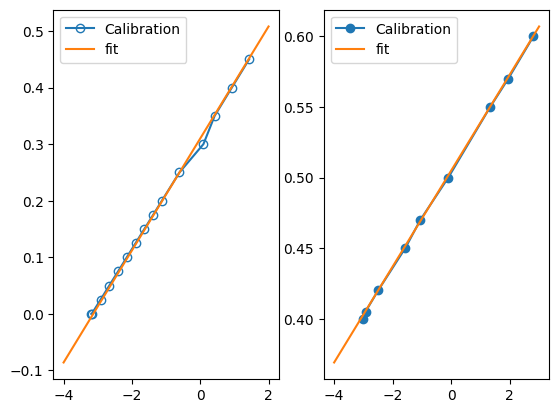

In [139]:
import matplotlib.pyplot as plt
c1=np.loadtxt('calibration1.txt')
c2=np.loadtxt('calibration2.txt')

fig=plt.figure()
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

y=c1[:,0] # extension in [mm]
x=c1[:,1] # voltage
ind=np.argsort(x)
y=y[ind]
x=x[ind]
ax1.plot(x,y,'-o',mfc='None',label='Calibration')
ind=np.argsort(c1)

## let's find out what y=ax+b fits this equation well.
a1=0.099
b1=0.31
xs=np.linspace(-4,2)
ys=xs*a1+b1
ax1.plot(xs,ys,label='fit')
ax1.legend()

y=c2[:,0]
x=c2[:,1]
ind=np.argsort(x)
x=x[ind]
y=y[ind]
ax2.plot(x,y,'-o',label='Calibration')
a2=0.034
b2=0.505
xs=np.linspace(-4,3)
ys=xs*a2+b2
ax2.plot(xs,ys,label='fit')
ax2.legend()

FileNotFoundError: /Users/youngung/Library/CloudStorage/OneDrive-창원대학교/ExpDat/IFSteel/uni/IF_Steel_uniaxial/DD1/Voltage.txt not found.

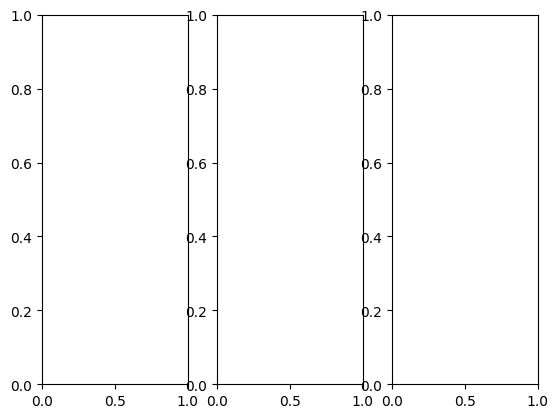

In [153]:
fnexp='/Users/youngung/Library/CloudStorage/OneDrive-창원대학교/ExpDat/IFSteel/uni/IF_Steel_uniaxial/DD1/Voltage.txt'
fig=plt.figure()
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

d=np.loadtxt(fnexp,skiprows=7).T
ax1.plot(-d[2],d[1],label='Raw data in voltage')
x=-d[2]*a1+b1
x=x-x[0]
y=d[1]*a2+b2
y=y-y[0]
ax2.plot(x,y)

In [159]:
fn='../data/force_vs_displ.txt'
!cat -n {fn} | head -n 20

     1	MTS793|MPT|ENU|1|2|.|/|:|1|0|0|A
     2	
     3	Operator Information						Time:	44.94857	Sec	4/10/2014 10:37:22 AM
     4	User	Luecke
     5	Specimen	RD1
     6	Experiment	201404103
     7	material	IF steel 
     8	w 	12.695	mm
     9	t	1.193	mm
    10	Extensometer 1	MTS 632-11B-20 S/N 925 G=25.4mm
    11	Gauge length pins free?	yes
    12	Control Program	20140408-tension-relaxation-dispcontrol-v1
    13	Test Notes	programmed relaxation test
    14	User Test Notes	first displacment-controlled test on IF steel
    15	Operator Information End
    16	
    17	Data Acquisition						Time:	88.029785	Sec	4/10/2014 10:38:05 AM
    18	Time	Axial Displacement	Axial Force	Axial Strain
    19	Sec	mm	N	mm/mm
    20	69.077316	-10.122135	80.368652	0.00049684133
cat: stdout: Broken pipe


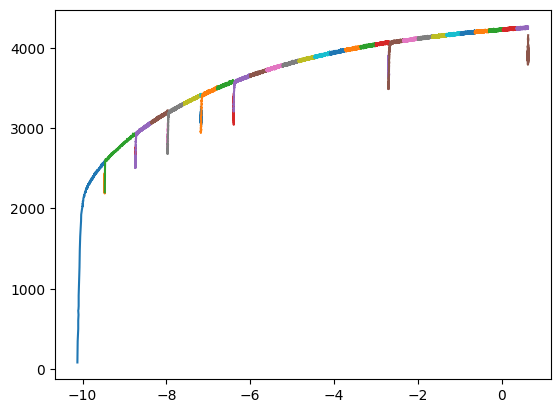

In [229]:
with open(fn,'r') as fo:
    cnt=fo.read()
    blocks=cnt.split('Data Acquisition')
    blocks=blocks[1:]

for ib,block in enumerate(blocks):
    lines=block.split('\n')
    lines=lines[3:-2]
    bl=''
    dmaster=np.zeros((len(lines),4),dtype='float')
    for i, line in enumerate(lines):
        dmaster[i,:]=np.array(line.split('\t'),dtype='float')

    plt.plot(dmaster[:,1],dmaster[:,2])
    #plt.plot(dmaster[:,3],dmaster[:,2])

(314, 4)

In [17]:
np.random.rand(3)

array([0.59294481, 0.73847607, 0.12452155])

In [39]:
#def gauss(mu,sigma,x):
#    return 1./(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

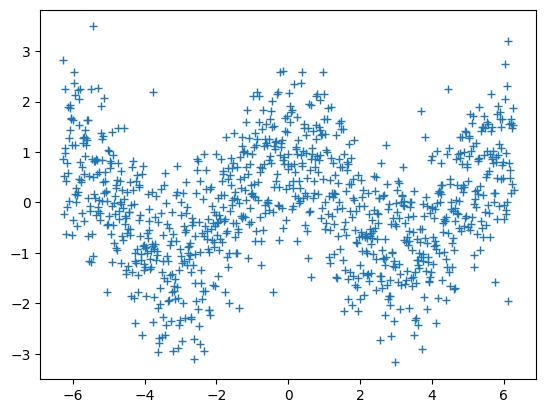

In [57]:
num=1000
xs=np.linspace(-2*np.pi,2*np.pi,num=num)
#for i in range(30):
ys=np.cos(xs)
#ys_=ys+np.random.rand(num)-0.5
ys_=ys+np.random.normal(0,0.9,num)
xs_=xs+np.random.rand(num)

plt.plot(xs,ys_,'+')
#plt.plot(xs,ys,'-')

#plt.plot(np.random.rand(),'x')

Text(0, 0.5, '$\\cos\\theta$')

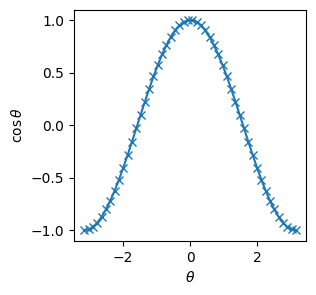

In [4]:
fig=plt.figure(figsize=(3,3))
ax=fig.add_subplot(111)
x=np.linspace(-np.pi,np.pi)
y=np.cos(x)
ax.plot(x,y,'-x')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\cos\theta$')

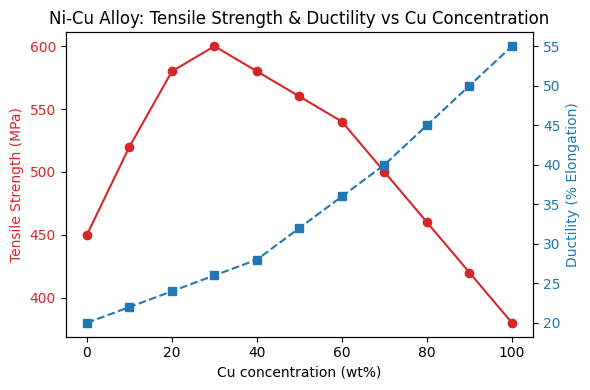

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# 가상의 조성 데이터 (Cu wt%)
cu = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# 가상의 인장강도 (MPa)
tensile_strength = np.array([450, 520, 580, 600, 580, 560, 540, 500, 460, 420, 380])

# 가상의 연성 (% elongation)
ductility = np.array([20, 22, 24, 26, 28, 32, 36, 40, 45, 50, 55])

fig, ax1 = plt.subplots(figsize=(6,4))

# 첫 번째 y축: 인장강도
color = "tab:red"
ax1.set_xlabel("Cu concentration (wt%)")
ax1.set_ylabel("Tensile Strength (MPa)", color=color)
ax1.plot(cu, tensile_strength, "o-", color=color, label="Tensile Strength")
ax1.tick_params(axis="y", labelcolor=color)

# 두 번째 y축: 연성
ax2 = ax1.twinx()  # x축은 공유, y축만 추가
color = "tab:blue"
ax2.set_ylabel("Ductility (% Elongation)", color=color)
ax2.plot(cu, ductility, "s--", color=color, label="Ductility")
ax2.tick_params(axis="y", labelcolor=color)

plt.title("Ni-Cu Alloy: Tensile Strength & Ductility vs Cu Concentration")
fig.tight_layout()
plt.show()


In [61]:
import periodictable

In [70]:
from periodictable import hydrogen, iron, copper, nickel, aluminum

In [74]:
print(copper.density, aluminum.density)

8.96 2.6989


In [75]:
import periodictable as pt

def atomic_to_weight_fraction(atomic_fractions):
    """
    원자비 -> 무게비 변환
    atomic_fractions: dict, {원소기호: 원자비}
    return: dict, {원소기호: 무게비}
    """
    total_mass = sum(atomic_fractions[el] * getattr(pt, el).mass for el in atomic_fractions)
    weight_fractions = {el: (atomic_fractions[el] * getattr(pt, el).mass) / total_mass for el in atomic_fractions}
    return weight_fractions


def weight_to_atomic_fraction(weight_fractions):
    """
    무게비 -> 원자비 변환
    weight_fractions: dict, {원소기호: 무게비}
    return: dict, {원소기호: 원자비}
    """
    total_atoms = sum(weight_fractions[el] / getattr(pt, el).mass for el in weight_fractions)
    atomic_fractions = {el: (weight_fractions[el] / getattr(pt, el).mass) / total_atoms for el in weight_fractions}
    return atomic_fractions


In [76]:
# 1. 원자비 → 무게비 변환 (50 at% Ni, 50 at% Cu)
atomic_frac = {"Ni": 0.5, "Cu": 0.5}
w_frac = atomic_to_weight_fraction(atomic_frac)
print("무게비 (50:50 at%):", w_frac)

# 2. 무게비 → 원자비 변환 (Ni 40 wt%, Cu 60 wt%)
weight_frac = {"Ni": 0.4, "Cu": 0.6}
a_frac = weight_to_atomic_fraction(weight_frac)
print("원자비 (40:60 wt%):", a_frac)


무게비 (50:50 at%): {'Ni': 0.4801512441978609, 'Cu': 0.5198487558021391}
원자비 (40:60 wt%): {'Ni': 0.41920730198877076, 'Cu': 0.5807926980112292}
